<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left">Ingesta de Datos con Python</h1>

<h2 align="left"><i>Conectandonos a fuentes externas de datos</i></h2>

<p align="left">
  <h3><a href="https://joefaver.dev">Joseph F. Vergel-Becerra</a> | Introducción a Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>11/03/2023</i>
  <br><br>
  <a href="#tabla-de-contenido">Tabla de contenido</a> •
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <br><br>
</p>
<table align="left">
  <td>
    <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
      <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
    </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-beginners-course/blob/main/3-python-data-intake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-python-beginners-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-python-beginners-course?style=social" alt="Fork"/>
    </a>
  </td>
</table>
<br>
<br>

---

Bienvenid@ al curso interactivo de introducción a `Python`. Ya seas un programador experimentado o no, este curso está destinado a todos los que deseen aprender el lenguaje de programación `Python` desde cero y enfocar su especialización en la ciencia de datos.

<a id='tabla-de-contenido'></a>
## Tabla de contenido
    
<ol>
    <li><a href="#1-preludio"><b>Preludio</b></a></li>
    <li><a href="#2-conectarse-api"><b>¿Qué es una API web y cómo conectarnos a una?</b></a></li>
    <ol type="i">
        <li><a href="#i-yahoo">Yahoo! Finance's API</a></li>
        <li><a href="#ii-spotify">Spotify for Developers API</a></li>
    </ol>
    <!-- <li><a href="#3-conectarse-api"><b>¿Qué es una base de datos relacional y cómo conectarnos a una?</b></a></li> -->
    <li><a href="#ejercicios"><b>Ejercicios caso practico: "Ingesta de Datos con Python"</b></a></li>
</ol>

<a id="1-preludio"></a>
## 1. Preludio

In [1]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.9 o superior.")
assert sys.version_info >= (3, 9)
print("[INFO] Versiones verificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-python-beginners-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.9 o superior.
[INFO] Versiones verificadas exitosamente!


<a id="2-conectarse-api"></a>
## 2. ¿Qué es una API web y cómo conectarnos a una?

Las API son mecanismos que permiten a dos componentes de software comunicarse entre sí mediante un conjunto de definiciones y protocolos. Por ejemplo, el sistema de software del instituto de meteorología contiene datos meteorológicos diarios. La aplicación meteorológica de su teléfono “habla” con este sistema a través de las API y le muestra las actualizaciones meteorológicas diarias en su teléfono.

> *Las Interfaces de Programacion de Aplicaciones (APIs por sus siglas en inglés) son construcciones disponibles en los lenguajes de programación que permiten a los desarrolladores crear funcionalidades complejas de una manera simple. Estas abstraen el código más complejo para proveer una sintaxis más fácil de usar en su lugar. Como ejemplo, piensa en el suministro de electricidad de tu casa, apartamento, o cualquier otro edificio. Si quieres usar un electrodoméstico, simplemente lo conectas en un enchufe y funciona. No intentas conectarlo directamente a la fuente de alimentación — hacerlo sería muy ineficiente y, si no eres electricista, dificil y peligroso.*

Retomando ideas anteriores, si quisieras programar gráficos 3D, sería mucho más facil hacerlo usando una API escrita en un lenguaje de alto nivel como `Python`, en lugar de intentar escribir código de bajo nivel (por ejemplo: `C` o `C++`) que controle directamente la GPU del equipo u otras funciones gráficas.

La arquitectura de las API suele explicarse en términos de **cliente** y **servidor**. La aplicación que envía la solicitud se llama **cliente**, y la que envía la respuesta se llama **servidor** (Ver Figura 1). En el ejemplo del tiempo, la base de datos meteorológicos del instituto es el servidor y la aplicación móvil es el cliente.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://i.imgur.com/wpZKuSW.png" alt="python-interpreter">
  </a><br>
  <b>Figura 1:</b> Arquitectura basica de una API.
</p><br>



**¿Qué tipos de APIs existen?**

Las API pueden funcionar de cuatro maneras diferentes y suelen asociarse como tipos:

- **API de SOAP:** Estas API utilizan el protocolo simple de acceso a objetos. El cliente y el servidor intercambian mensajes mediante XML. Se trata de una API menos flexible que era más popular en el pasado.

- **API de RPC:** Estas API se denominan llamadas a procedimientos remotos. El cliente completa una función (o procedimiento) en el servidor, y el servidor devuelve el resultado al cliente.

- **API de WebSocket:** La API de WebSocket es otro desarrollo moderno de la API web que utiliza objetos JSON para transmitir datos. La API de WebSocket admite la comunicación bidireccional entre las aplicaciones cliente y el servidor. El servidor puede enviar mensajes de devolución de llamada a los clientes conectados, por lo que es más eficiente que la API de REST.

- **API de REST:** Estas son las API más populares y flexibles que se encuentran en la web actualmente. El cliente envía las solicitudes al servidor como datos. El servidor utiliza esta entrada del cliente para iniciar funciones internas y devuelve los datos de salida al cliente.



**Cómo conectarse a un API REST**

Para conectarse a una API web tipo REST, tenemos diversas opciones, a continuacion se xponen las dos mas sencillas:

- **A través de una biblioteca tipo cliente por protocolo HTTP/HTTPS:** En lugar de programar un HTTP módulo de solicitud desde cero, los desarrolladores confían en varias bibliotecas de solicitudes HTTP de `Python`. Algunas de estas son `requests`, `httpx` y `http.client`.

- **A través de una biblioteca o un kit de desarrollo de software (SDK):** La forma mas facil de consumir una API es utilizando una biblioteca o un SDK especialmente disendo para conectarse a la API y realizar consultas. A continuacion utilizaremos la biblioteca `yfinance` para conectarnos a la API de [Yahoo! Finance](https://finance.yahoo.com/).


<a id="i-yahoo"></a>
### A. Yahoo! Finance's API"

La forma mas facil de consumir una API es utilizando una biblioteca o un Kit de desarrollo de softwware especialmente disendo para conectarse a la API y realizar consultas.

<p align="center">
  <a target="_blank">
    <img width="600px" src="https://i.imgur.com/foHjiKi.png" alt="python-interpreter">
  </a><br>
</p><br>

<p align="center">
  <a target="_blank">
    <img width="600px" src="https://i.imgur.com/QIGR1fq.png" alt="python-interpreter">
  </a><br>
</p><br>

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for frozendict: filename=frozendict-2.3.6-py3-none-any.whl size=13591 sha256=39b65122b036dc78557145203c65b0843533150a8d901d74fa8c68833060c99e
  Stored in directory: /Users/joefaver/Library/Caches/pip/wheels/34/dd/5e/fa468c776da3bf01b15f16a68df9d520b79542f36181e4fe4a
Successfully built frozendict
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you h

In [15]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf


tsla = yf.Ticker("TSLA")

start_date, end_date = '2022-01-01', datetime.now().strftime('%Y-%m-%d')
tsla_hist = tsla.history(start=start_date, end=end_date)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Tesla stocks historical dataset (TSLA) dimensions (rows, cols): {tsla_hist.shape}")
    print(
        "[INFO] Time window of Tesla stocks dataset (min, max): "
        f"({tsla_hist.index.min()}, {tsla_hist.index.max()})"
    )
    display(tsla_hist)

[INFO] Tesla stocks historical dataset (TSLA) dimensions (rows, cols): (310, 7)
[INFO] Time window of Tesla stocks dataset (min, max): (2022-01-03 00:00:00-05:00, 2023-03-28 00:00:00-04:00)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,382.583344,400.356659,378.679993,399.926666,103931400,0.0,0.0
2022-01-04 00:00:00-05:00,396.516663,402.666656,374.350006,383.196655,100248300,0.0,0.0
2022-01-05 00:00:00-05:00,382.216675,390.113342,360.336670,362.706665,80119800,0.0,0.0
2022-01-06 00:00:00-05:00,359.000000,362.666656,340.166656,354.899994,90336600,0.0,0.0
2022-01-07 00:00:00-05:00,360.123322,360.309998,336.666656,342.320007,84164700,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-22 00:00:00-04:00,199.300003,200.660004,190.949997,191.149994,150376400,0.0,0.0
2023-03-23 00:00:00-04:00,195.259995,199.309998,188.649994,192.220001,144193900,0.0,0.0
2023-03-24 00:00:00-04:00,191.649994,192.360001,187.149994,190.410004,116312400,0.0,0.0


In [12]:
tsla_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2022-01-03 00:00:00-05:00 to 2023-03-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          310 non-null    float64
 1   High          310 non-null    float64
 2   Low           310 non-null    float64
 3   Close         310 non-null    float64
 4   Volume        310 non-null    int64  
 5   Dividends     310 non-null    float64
 6   Stock Splits  310 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 19.4 KB


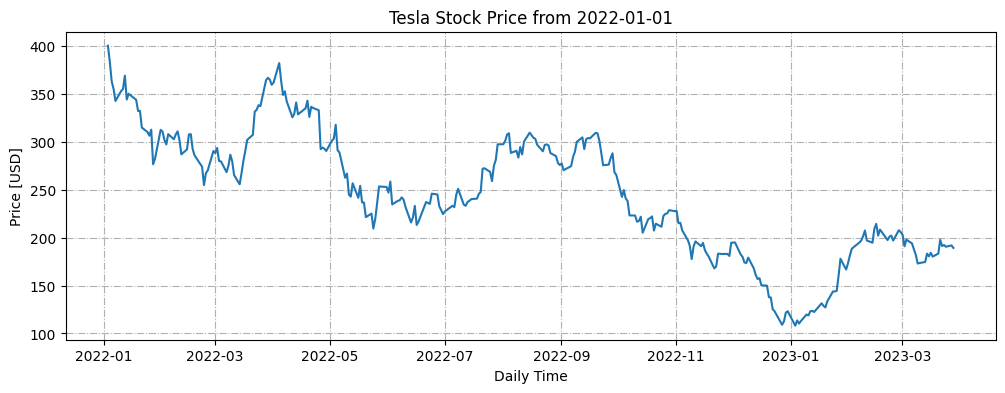

In [17]:
plt.figure(figsize=(12,4))
plt.plot(tsla_hist["Close"])
plt.grid(linestyle='-.')
plt.title(f"Tesla Stock Price from {start_date}")
plt.xlabel("Daily Time")
plt.ylabel("Price [USD]")
plt.show()

In [50]:
def plot_stock_feature(
    data: pd.DataFrame,
    stock: dict,
    feature: str,
    ax: plt.Axes,
    show: bool = None
) -> plt.Axes:
    ax.plot(data[feature])
    ax.grid(linestyle='-.')
    ax.set_title(f"{stock['name']} ({stock['ticker']}) Stock Price")
    ax.set_xlabel("Daily Time")
    ax.set_ylabel("Price [USD]")
    if show:
        plt.show()
    return ax

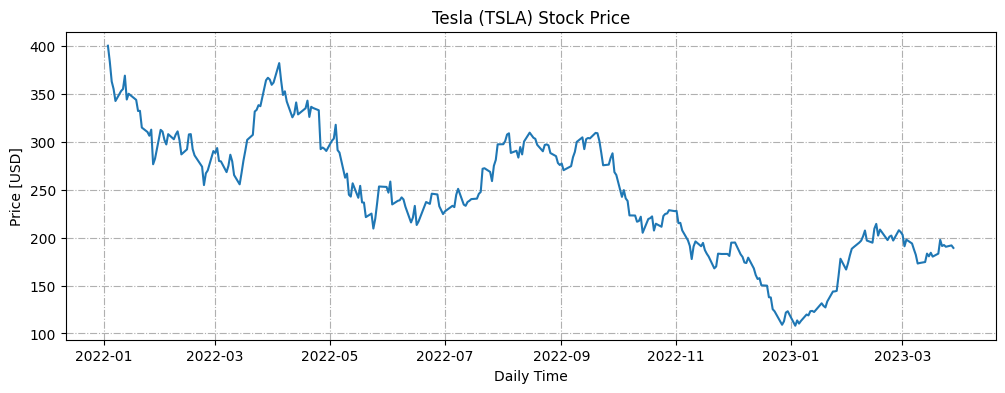

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
_ = plot_stock_feature(
    data=tsla_hist,
    stock={"name": "Tesla", "ticker": "TSLA"},
    feature="Close",
    ax=ax,
    show=True
)

In [52]:
def get_stock_data(stock: dict, start_date: str, end_date: str):
    stock = yf.Ticker(stock["ticker"])
    data = stock.history(start=start_date, end=end_date)
    return data


get_stock_data(
    stock={"name": "Apple", "ticker": "AAPL"}, start_date=start_date, end_date=end_date
)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,176.534331,181.547540,176.415210,180.683868,104487900,0.0,0.0
2022-01-04 00:00:00-05:00,181.299361,181.607100,177.814925,178.390701,99310400,0.0,0.0
2022-01-05 00:00:00-05:00,178.301370,178.857287,173.367580,173.645538,94537600,0.0,0.0
2022-01-06 00:00:00-05:00,171.441708,174.022770,170.389433,170.746811,96904000,0.0,0.0
2022-01-07 00:00:00-05:00,171.630328,172.871221,169.783880,170.915573,86709100,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-22 00:00:00-04:00,159.300003,162.139999,157.809998,157.830002,75701800,0.0,0.0
2023-03-23 00:00:00-04:00,158.830002,161.550003,157.679993,158.929993,67622100,0.0,0.0
2023-03-24 00:00:00-04:00,158.860001,160.339996,157.850006,160.250000,59196500,0.0,0.0


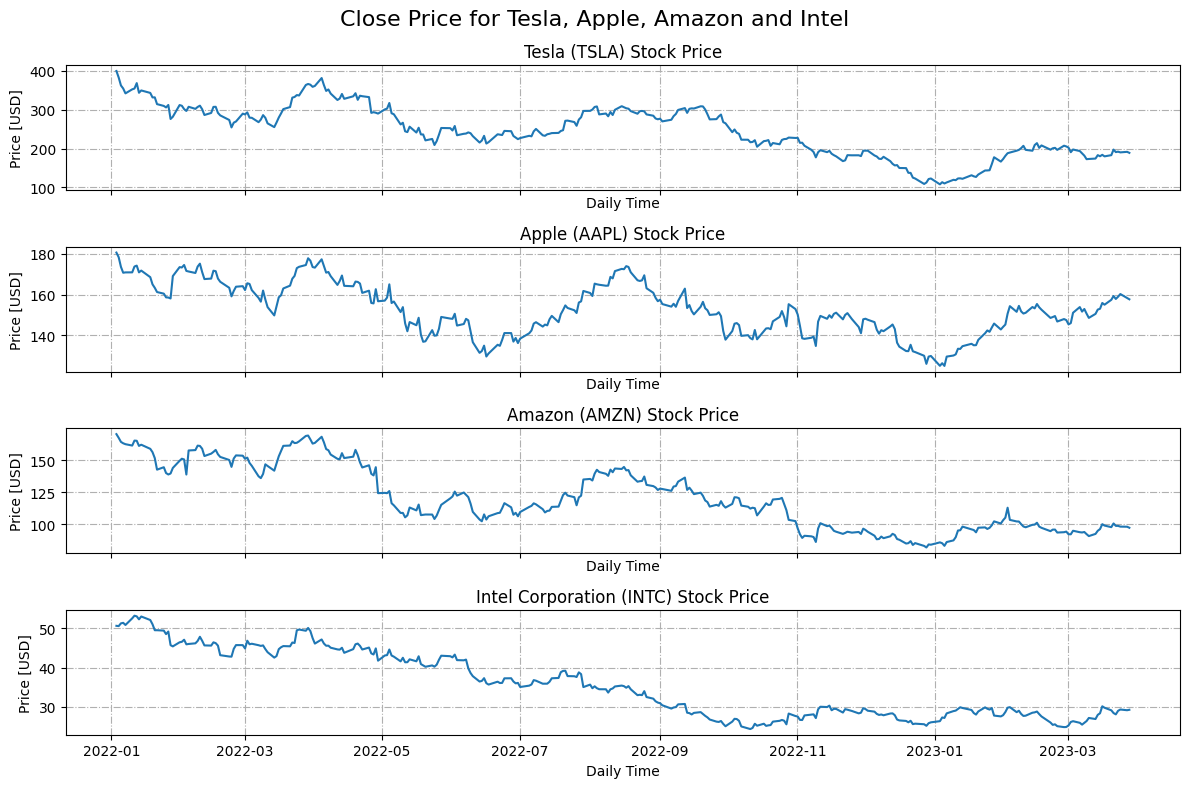

In [58]:
stocks = [
    {"name": "Tesla", "ticker": "TSLA"},
    {"name": "Apple", "ticker": "AAPL"},
    {"name": "Amazon", "ticker": "AMZN"},
    {"name": "Intel Corporation", "ticker": "INTC"},
]

datasets = {}
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
for index, stock in enumerate(stocks):
    data = get_stock_data(stock=stock, start_date=start_date, end_date=end_date)
    axes[index] = plot_stock_feature(
        data=data,
        stock=stock,
        feature="Close",
        ax=axes[index],
        show=False
    )
    datasets[stock["ticker"]] = data
fig.suptitle("Close Price for Tesla, Apple, Amazon and Intel", fontsize=16)
plt.tight_layout()
plt.show()


In [59]:
datasets["AAPL"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,176.534316,181.547525,176.415195,180.683853,104487900,0.0,0.0
2022-01-04 00:00:00-05:00,181.299361,181.607100,177.814925,178.390701,99310400,0.0,0.0
2022-01-05 00:00:00-05:00,178.301370,178.857287,173.367580,173.645538,94537600,0.0,0.0
2022-01-06 00:00:00-05:00,171.441708,174.022770,170.389433,170.746811,96904000,0.0,0.0
2022-01-07 00:00:00-05:00,171.630313,172.871206,169.783865,170.915558,86709100,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-22 00:00:00-04:00,159.300003,162.139999,157.809998,157.830002,75701800,0.0,0.0
2023-03-23 00:00:00-04:00,158.830002,161.550003,157.679993,158.929993,67622100,0.0,0.0
2023-03-24 00:00:00-04:00,158.860001,160.339996,157.850006,160.250000,59196500,0.0,0.0


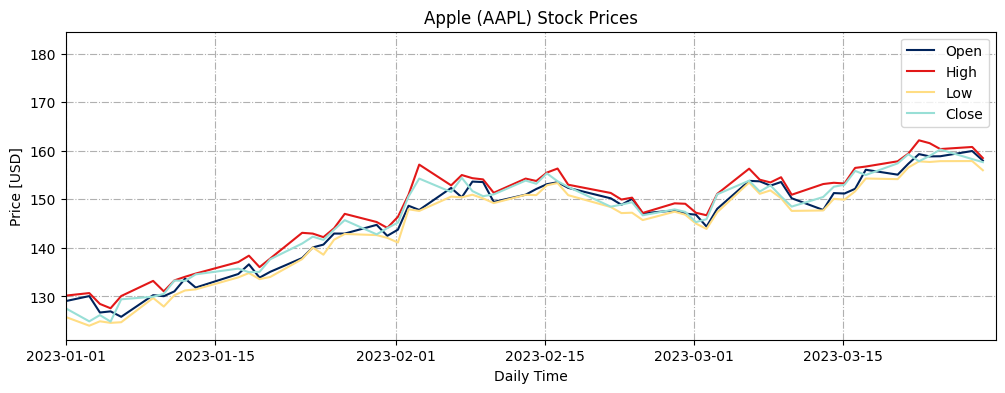

In [151]:
colors = ["#00235B", "#E21818", "#FFDD83", "#98DFD6"]
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)

for index, feature in enumerate(["Open", "High", "Low", "Close"]):
    ax.plot(datasets["AAPL"][feature], color=colors[index], label=feature)
    
ax.legend()
ax.grid(linestyle='-.')
ax.set_title("Apple (AAPL) Stock Prices")
ax.set_xlabel("Daily Time")
ax.set_ylabel("Price [USD]")
ax.set_xlim((datetime(2023, 1, 1, 0, 0, 0), datetime.now()))
plt.show()

In [75]:
import plotly.graph_objects as go


fig = go.Figure(
    data=[
        go.Candlestick(x=datasets["AAPL"].index,
        open=datasets["AAPL"]['Open'],
        high=datasets["AAPL"]['High'],
        low=datasets["AAPL"]['Low'],
        close=datasets["AAPL"]['Close'])
    ]
)
fig.show()

In [186]:
def compute_bollinger_bands(
    data: pd.DataFrame, width: int = 2, window: int = 5, min_periods: int = 1
) -> pd.DataFrame():
    sma = data["Close"].rolling(window=window, min_periods=min_periods).mean()
    std = data["Close"].rolling(window=window, min_periods=min_periods).std()

    bb = pd.DataFrame()
    bb['bb_sma'] = sma
    bb['bb_lower'] = bb['bb_sma'] - width * std
    bb['bb_upper'] = bb['bb_sma'] + width * std
    return bb


def plot_bollinger_bands(
    data: pd.DataFrame,
    stock: dict,
    ax: plt.Axes,
    show: bool = None
) -> plt.Axes:
    ax.plot(data["bb_sma"], color="#00235B", label="SMA")
    ax.fill_between(
        x=data.index,
        y2=data["bb_lower"],
        y1=data["bb_upper"], 
        alpha=0.3,
        linewidth=2,
        color="#576CBC",
        label="Bollinger Bands"
    )

    ax.legend()
    ax.grid(linestyle='--')
    ax.set_title(f"Bollinger Bands of {stock['name']} ({stock['ticker']}) Stock Price")
    ax.set_xlabel("Daily Time")
    ax.set_ylabel("Price [USD]")
    if show:
        plt.show()
    return ax

In [187]:
features = ["Open", "High", "Low", "Close"]
data_with_bb = data.copy()
data_with_bb = compute_bollinger_bands(
    data=data_with_bb[features], width=2
)
data_with_bb = data[features].merge(
    data_with_bb, how='left', on=data[features].index
).rename(columns={"key_0": "Date"})
data_with_bb.set_index("Date", inplace=True)
data_with_bb

,Open,High,Low,Close,bb_sma,bb_lower,bb_upper
Date,,,,,,,
2022-01-03 00:00:00-05:00,49.080217,50.581605,49.032702,50.562599,50.562599,NaN,NaN
2022-01-04 00:00:00-05:00,50.904692,51.256282,50.030467,50.496086,50.529343,50.435279,50.623406
2022-01-05 00:00:00-05:00,51.493844,53.375332,51.151759,51.189766,50.749484,49.983997,51.514970
2022-01-06 00:00:00-05:00,51.892950,51.949962,50.762154,51.322800,50.892813,50.044675,51.740950
2022-01-07 00:00:00-05:00,51.493839,51.683889,50.505586,50.781155,50.870481,50.129214,51.611748
...,...,...,...,...,...,...,...
2023-03-22 00:00:00-04:00,28.480000,29.120001,28.100000,28.129999,29.148000,27.412176,30.883823
2023-03-23 00:00:00-04:00,28.379999,29.160000,28.219999,29.030001,28.918000,27.615125,30.220874
2023-03-24 00:00:00-04:00,29.040001,29.809999,28.930000,29.360001,28.828000,27.800049,29.855951


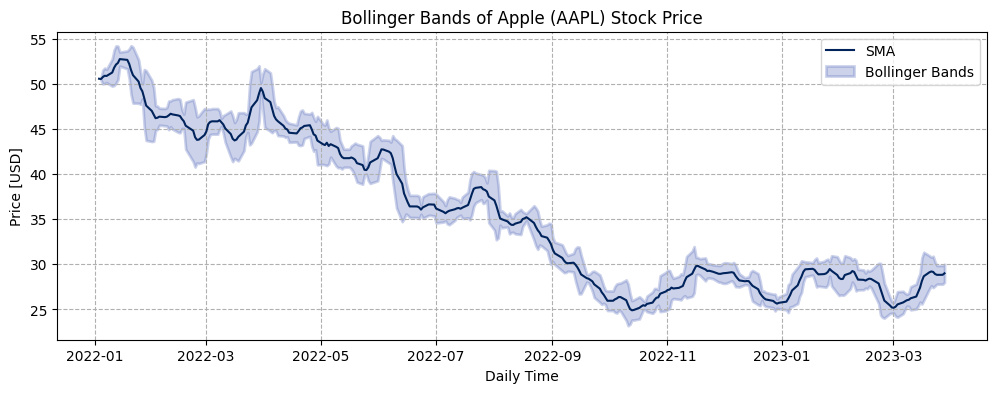

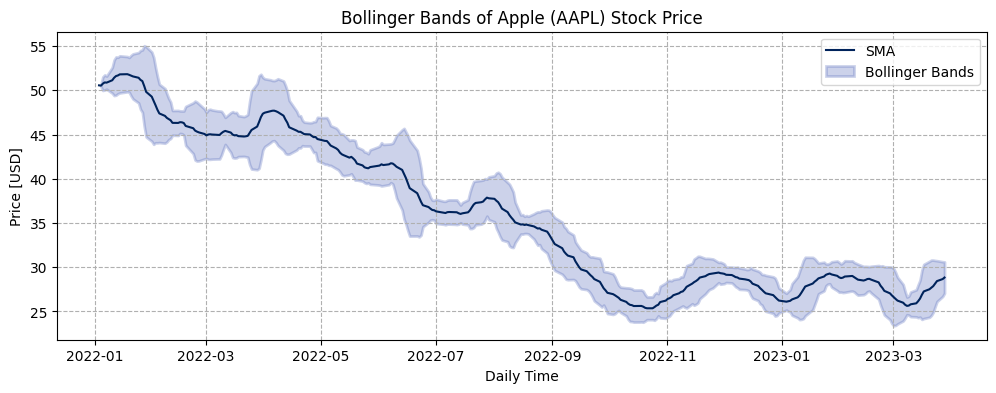

In [188]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
_ = plot_bollinger_bands(
    data=data_with_bb,
    stock={"name": "Apple", "ticker": "AAPL"},
    ax=ax,
    show=True
)

features = ["Open", "High", "Low", "Close"]
data_with_bb = data.copy()
data_with_bb = compute_bollinger_bands(
    data=data_with_bb[features], width=2, window=12, min_periods=1
)
data_with_bb = data[features].merge(
    data_with_bb, how='left', on=data[features].index
).rename(columns={"key_0": "Date"})
data_with_bb.set_index("Date", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
_ = plot_bollinger_bands(
    data=data_with_bb,
    stock={"name": "Apple", "ticker": "AAPL"},
    ax=ax,
    show=True
)

<a id="ii-spotify"></a>
### B. Spotify for Developers API

La sintaxis de `Python` permite a los programadores codificar utilizando menos pasos en comparación con otros lenguajes.

Veamos como ejemplo nuestro primer código y primer programa clásico en cualquier lenguaje de programación, el popular `Hello world!`:

<a id="ejercicios"></a>
## 3. Ejercicios caso práctico: "Ingesta de Datos con Python"

1. Bitcoin (BTC-USD) es la criptomoneda más popular en la actualidad y ha sufrido en los últimos meses varios desplomes abruptos. Para analizar el comportamiento de la criptodivisa, resuelva e implemente los siguientes pasos:
   - Consulte los datos para la criptomoneda Bitcoin a través del *ticker* BTC-USD, en el periodo de tiempo comprendido entre el primero de enero del 2020 y el 29 de marzo del 2023.
   - Grafique las series de tiempo de los precios mínimos y de los precios mas altos.
   - Visualice el comportamiento del precio de cierre entre el primero de enero del 2021 y el primero de mayo del 2022.
   - Calcule y visualice las bandas de Bollinger.
   - Implemente una función que calcule el promedio móvil (*Simple Moving Average*) del precio típico, a partir de los siguientes pasos
       1. Calcule el precio típico a partir de la siguiente formula:
      
           $$typical\_price = \frac{high + low + close}{3}.$$
       2. Tome el precio típico y aplique un promedio móvil con una venta de veinte periodos y un valor del mínimo de periodos igual a uno:


           ```python
               pd.Series.rolling(window=window, min_periods=min_periods).mean()
           ```
       3. Finalmente, retorne el resultado y concatenelo al *dataframe* original.
   - Grafique el precio de cierre y el promedio móvil del precio típico (calculado en el punto anterior) en el mismo gráfico, para su comparación.


**NOTA:** A manera de comprobación, sus resultados deben verse similares a los siguientes gráficos:

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/LGUMyEF.png" alt="python-interpreter">
  </a><br>
</p><br>

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/CpLgFHh.png" alt="python-interpreter">
  </a><br>
</p><br>

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/cDyTiQJ.png" alt="python-interpreter">
  </a><br>
</p><br>

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/O9cWMYx.png" alt="python-interpreter">
  </a><br>
</p><br>

<a id='referencias'></a>
## Referencias

[1] Matthes, E. (2019). *Python crash course: A hands-on, project-based introduction to programming.* no starch press.

[2] Downey, A. (2015). *Think python: How to Think Like a Computer Scientist.* "O'Reilly Media, Inc.". 

[3] Johansson, R. *Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib*. Apress, Berkeley, 2019.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joseph@guane.com.co">info@joefaver.dev</a> o directamente en el repositorio.</p>